# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/cs39aa_project/blob/main/project_part1.ipynb)

This notebook is intended to serve as a template to complete Part 1 of the projects. Feel free to modify this notebook as needed, but be sure to have the two main parts, a) a introductory proposal section describing what it is your doing to do and where the dataset originates, and b) an exploratory analysis section that has the histograms, charts, tables, etc. that are the output from your exploratory analysis. 

__Note you will want to remove the text above, and in the markdown cells below, and replace it with your own text describing the dataset, task, exploratory steps, etc.__

## Introduction/Background

_In this section you will describe (in English) the dataset you are using as well as the NLP problem it deals with. For example, if you are planning to use the Twitter Natural Disaster dataset, then you will describe what the data and where it came as if you were explaining it to someone who does not know anything about the data. You will then describe how this is a __text classification__ problem, and that the labels are binary (e.g. a tweet either refers to a genuine/real natural disaster, or it does not)._ 

_Overall, this should be about a paragraph of text that could be read by someone outside of our class, and they could still understand what it is your project is doing._ 

_Note that you should __not__ simply write one sentence stating, "This project is base on the Kaggle competition: Predicting Natural Disasters with Twitter._"

_If you are still looking for datasets to use, consider the following resources to explore text datasets._

* https://huggingface.co/datasets
* https://www.kaggle.com/datasets
* https://pytorch.org/text/stable/datasets.html
* https://github.com/niderhoff/nlp-datasets 
* https://medium.com/@ODSC/20-open-datasets-for-natural-language-processing-538fbfaf8e38 
* https://imerit.net/blog/25-best-nlp-datasets-for-machine-learning-all-pbm/ 
* https://index.quantumstat.com/#dataset


## Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [1]:
!pip install pyLDAvis
!pip install textstat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import sklearn
import gensim
import pyLDAvis
import wordcloud
import textblob
import spacy
import textstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=88247cf096cf59421564e240dab5b07bb69b5491acaa28f9c753605a7249c7b4
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=95c8d92ef3428c23b16a7873e36b46e388c75229169a421dbf7f52691757c26e
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


# Here is my dataset, it consists of 10,000 movie reviews, brought to us by Rotten Tomatoes; the dataset was gleaned from Kaggle. The X vector consists of the reviews while the y vector is binary representing either Rotten or Fresh [0 or 1]. I have also transformed the Top Critic, x1, vector to a binary vector representing either Top Critic or not Top Critic [1, 0].

In [2]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('rtom.csv')

tomatoes = data.dropna()
tomatoes.reset_index(inplace=True)
print(tomatoes.shape)
print(tomatoes.head())

selections1 = ['Review_Type', 'review_content']
selections2 = ['Top_Critic', 'review_content']
X = tomatoes[selections1].copy()
X2 = tomatoes[selections2].copy()
y = tomatoes.pop('Review_Type')
y2 = tomatoes.pop('Top_Critic')
print(X.shape)

Saving rtom.csv to rtom.csv
(7089, 11)
   index rotten_tomatoes_link       critic_name  top_critic  Top_Critic  \
0      3            m/0814255      Ben McEachen       False           0   
1      6            m/0814255      Nick Schager       False           1   
2      7            m/0814255  Bill Goodykoontz        True           0   
3      8            m/0814255    Jordan Hoffman       False           1   
4      9            m/0814255      Jim Schembri        True           0   

            publisher_name review_type  Review_Type review_score review_date  \
0  Sunday Mail (Australia)       Fresh            1        3.5/5    2/9/2010   
1           Slant Magazine      Rotten            0        4-Jan   2/10/2010   
2         Arizona Republic       Fresh            1        3.5/5   2/10/2010   
3                      UGO       Fresh            1            B   2/10/2010   
4      The Age (Australia)       Fresh            1        5-Mar   2/10/2010   

                             

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.80, random_state=1)
pd.set_option("display.max_colwidth", 300)
print(X_train.shape)
print(y_train.shape)
print(X_train.head(10))  # Rotten=0, Fresh=1

(5671, 2)
(5671,)
      Review_Type  \
2707            0   
5397            1   
4137            0   
4821            1   
2836            1   
6414            1   
2900            1   
2093            0   
1412            1   
1190            1   

                                                                                                                                                                        review_content  
2707                                         Slickly made but utterly gratuitous, this wannabe-edgy thriller was an odd choice for Ventimiglia to make during his first Heroes hiatus.  
5397                                         Working with utterly predictable material, screenwriter Kevin Hench finds plenty of offbeat humor, and Carolla knows how to make it sing.  
4137                                                                                             Sirk or Billy Wilder could have done something with it. Sachs still has a ways to go.  
4821      

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

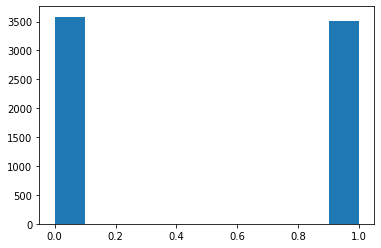

In [8]:
import matplotlib.pyplot as plt
plt.hist(y)
plt


In [9]:
import numpy as np
y_num = np.asarray(y)
unique, counts = np.unique(y_num, return_counts=True)
print(f"Count of 0 = Rotten and 1 = Fresh: {dict(zip(unique, counts))}") 

Count of 0 = Rotten and 1 = Fresh: {0: 3583, 1: 3506}


# Above we can see there are 3583 'Fresh' reviews and 3506 'Rotten' reviews; note I removed review rows containing null.

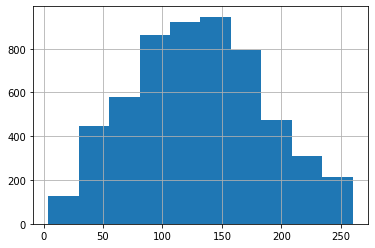

In [10]:
X_train['review_content'].str.len().hist()

# The Histogram shows that the average number of characters is around 148.

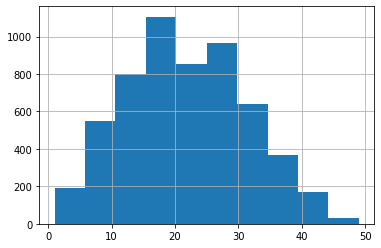

In [11]:
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
plot_word_number_histogram(X_train['review_content'])

# The above Histogram show the average amount of words per review to be somewhere around 22.

# Now we will begin to tokenize and remove stopwords

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))
corpus=[]
new= X_train['review_content'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

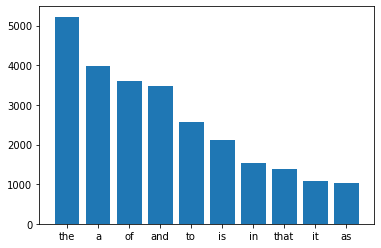

In [14]:
plot_top_stopwords_barchart(X_train['review_content'])

# In case anyone cares the above shows the most frequent stop words, the results are pretty much what one would expect

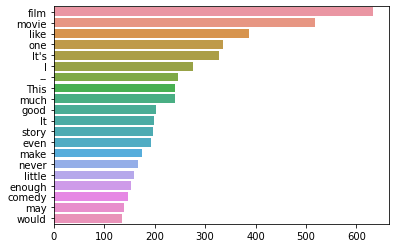

In [15]:
import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    chars2remove = set(['.', '!', '/', '?', ',', '@', '#', '$', '%', '^', '&', '*', '_', '-', '~'])
    #X_train['tokens_raw'] = X_train['tokens_raw'].apply(lambda x: [w for w in x if w not in chars2remove])
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:80]:
        if (word not in stop and word != 'The' and word != 'A' and word != chars2remove):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(X_train['review_content'])

# Surprise surprise film and movie make the top five words (not included in stops), also The and A were showing up so I removed them along with symbols (there seems to be a hyphen or underscore showing up though, it's very stubborn and won't leave)

In [16]:
import nltk
nltk.download('stopwords')
stop=set(stopwords.words('english'))
corpus=[]
new= X_train['review_content'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()
X_train['tokens_raw'] = X_train['review_content'].apply(lambda x: tk.tokenize(x.lower()))
chars2remove = set(['.', '!', '/', '?', ',', '@', '#', '$', '%', '^', '&', '*', '_', '-', '~', 'The', 'A','`', '+', "'", '"'])
X_train['tokens_raw'] = X_train['tokens_raw'].apply(lambda x: [w for w in x if w not in chars2remove and w not in stop])
#X_train['token_length'] = X_train['tokens_raw'].apply(lambda x: len(x))
print(X_train.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


      Review_Type  \
2707            0   
5397            1   
4137            0   
4821            1   
2836            1   

                                                                                                                                                                       review_content  \
2707                                        Slickly made but utterly gratuitous, this wannabe-edgy thriller was an odd choice for Ventimiglia to make during his first Heroes hiatus.   
5397                                        Working with utterly predictable material, screenwriter Kevin Hench finds plenty of offbeat humor, and Carolla knows how to make it sing.   
4137                                                                                            Sirk or Billy Wilder could have done something with it. Sachs still has a ways to go.   
4821                                                                                The performances feel natural, improvised, and it

# The above tokens raw is without stops and symbols

# Now lets play around with Sentiment, below is just to illustrate how it works.

In [17]:
from textblob import TextBlob
#TextBlob('This movie was so awful it was great').sentiment
#TextBlob('This movie was very bad').sentiment
TextBlob("It's impressuve they were able to even make this movie because I can only assume the budget was whatever the producer stole from his sons piggy bank").sentiment
# These were not real reviews

Sentiment(polarity=0.25, subjectivity=0.8125)

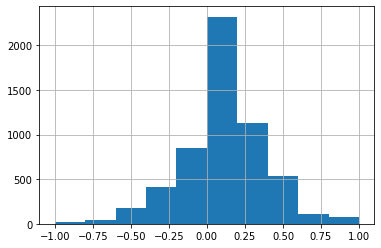

In [18]:
from textblob import TextBlob
    
def plot_polarity_histogram(text):
    
    def _polarity(text):
        return TextBlob(text).sentiment.polarity
        
    polarity_score =text.apply(lambda x : _polarity(x))
    polarity_score.hist()

plot_polarity_histogram(X_train['review_content'])

# After plotting sentiment we are left with a slightly left skewed normal distribution with the mean level of polarity above neutral.

# We now know what the dataset looks like and have an understanding of the content, we are now ready to start predicting either Rotten or Fresh (also if the content was written by a top reviewer but that would mostly be for fun)

Most of the above plots were generated using code gleaned from "Exploratory Data Analysis for Natural Language Processing: A Complete Guide to Python Tools" by Shahul ES

In [19]:
X_train_tRaw= X_train['tokens_raw'].apply(lambda x: [w for w in x if w not in chars2remove and w not in stop])
print(X_train_tRaw) # the raw token file

2707                                             [slickly, made, utterly, gratuitous, wannabe-edgy, thriller, odd, choice, ventimiglia, make, first, heroes, hiatus]
5397                                [working, utterly, predictable, material, screenwriter, kevin, hench, finds, plenty, offbeat, humor, carolla, knows, make, sing]
4137                                                                                           [sirk, billy, wilder, could, done, something, sachs, still, ways, go]
4821                                                                                        [performances, feel, natural, improvised, easy, believe, world, inhabit]
2836          [yes, u2014, giving, christmas, carol, high, rating, technical, perfection, brilliantly, done, however, much, zemeckis, much, carrey, enough, dickens]
                                                                                    ...                                                                             
905       